# Lesson 3: NumPy and Pandas for 2D Data

## 2D NumPy Arrays

In [1]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [2]:
# Accessing elements

print ridership[1, 3], '\n'
print ridership[1:3, 3:5], '\n'
print ridership[1, :]

2328 

[[2328 2539]
 [6461 2691]] 

[1478 3877 3674 2328 2539]


In [3]:
# Vectorized operations on rows or columns

print ridership[0, :] + ridership[1, :], '\n'
print ridership[:, 0] + ridership[:, 1]

[1478 3877 3676 2333 2539] 

[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [4]:
# Vectorized operations on entire arrays

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print a + b

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [5]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    # ridership[day, station]

    overall_mean = ridership.mean()
    mean_for_max = ridership[:,ridership[0,:].argmax()].mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.6, 3239.9)

## NumPy Axis

In [6]:
# NumPy axis argument

a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print a.sum(), '\n'
print a.sum(axis=0), '\n'
print a.sum(axis=1)

45 

[12 15 18] 

[ 6 15 24]


In [7]:
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_ridership_per_day = ridership.mean(axis=0) # ...for each subway station
    max_daily_ridership = mean_ridership_per_day.max()
    min_daily_ridership = mean_ridership_per_day.min()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9, 1071.2)

## Accessing Elements of a DataFrame

In [8]:
import pandas as pd

In [9]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [10]:
# DataFrame creation

# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df_1, '\n'

# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print df_2

   A  B
0  0  3
1  1  4
2  2  5 

   A  B  C
0  0  1  2
1  3  4  5


In [11]:
# Accessing elements

print ridership_df.iloc[0], '\n'
print ridership_df.loc['05-05-11'], '\n'
# print ridership_df.loc['2011-05-05'], '\n' # returns an error
print ridership_df['R003'], '\n'
# print ridership_df['R002'], '\n ] # returns an error
print ridership_df.iloc[1, 3]

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64 

R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64 

05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64 

2328


In [12]:
# Accessing multiple rows

print ridership_df.iloc[1:4]
ridership_df.iloc[1:4]

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


,R003,R004,R005,R006,R007
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613


In [13]:
# Accessing multiple columns
print ridership_df[['R003', 'R005']]
ridership_df[['R003', 'R005']]

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


,R003,R005
05-01-11,0,2
05-02-11,1478,3674
05-03-11,1613,3991
05-04-11,1560,3826
05-05-11,1608,3932
05-06-11,1576,3909
05-07-11,95,255
05-08-11,2,1
05-09-11,1438,3589
05-10-11,1342,4009


In [14]:
# Pandas axis

df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print 'df = ', '\n', df, '\n'
print 'df.sum() = ', '\n', df.sum(), '\n'
print 'df.sum(axis=0) = ', '\n', df.sum(axis=0), '\n'
print 'df.sum(axis=1) = ', '\n', df.sum(axis=1), '\n'
print 'df.values.sum() = ', '\n', df.values.sum()

df =  
   A  B
0  0  3
1  1  4
2  2  5 

df.sum() =  
A     3
B    12
dtype: int64 

df.sum(axis=0) =  
A     3
B    12
dtype: int64 

df.sum(axis=1) =  
0    3
1    5
2    7
dtype: int64 

df.values.sum() =  
15


In [15]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[ridership_df.iloc[0].argmax()].mean()
    
    return (overall_mean, mean_for_max)
mean_riders_for_max_station(ridership_df)

(2342.6, 3239.9)

## Calculating Correlation

In [16]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    return ((x-x.mean())/x.std(ddof=0) * (y-y.mean())/y.std(ddof=0)).mean()

# test code:
x = pd.Series([1, 2, 3, 4])
y = pd.Series([10, 11, 12, 13])
print correlation(x, y)

1.0


In [17]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)
print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


## DataFrame Vectorised Operations

In [18]:
# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
entries_and_exits

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [19]:
# Adding DataFrames with the column names

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
df1 + df2

,a,b,c
0,11,44,77
1,22,55,88
2,33,66,99


In [20]:
# Adding DataFrames with overlapping column names 

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
df1 + df2

,a,b,c,d
0,NaN,74,47,NaN
1,NaN,85,58,NaN
2,NaN,96,69,NaN


In [21]:
# Adding DataFrames with overlapping row indexes

df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                   index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                   index=['row4', 'row3', 'row2'])
df1 + df2

,a,b,c
row1,NaN,NaN,NaN
row2,32.0,65.0,98.0
row3,23.0,56.0,89.0
row4,NaN,NaN,NaN


In [22]:
print df1
print df1.diff()
df1.shift(1)

      a  b  c
row1  1  4  7
row2  2  5  8
row3  3  6  9
        a    b    c
row1  NaN  NaN  NaN
row2  1.0  1.0  1.0
row3  1.0  1.0  1.0


,a,b,c
row1,NaN,NaN,NaN
row2,1.0,4.0,7.0
row3,2.0,5.0,8.0


In [23]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff()
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## DataFrame applymap()

In [24]:
# DataFrame applymap()

df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1

print df, '\n'
print df.applymap(add_one)

   a   b   c
0  1  10   5
1  2  20  10
2  3  30  15 

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [25]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [26]:
def percentage_to_grade(percentage):
    if percentage >= 90:
        return 'A'
    if percentage >= 80:
        return 'B'
    if percentage >= 70:
        return 'C'
    if percentage >= 60:
        return 'D'
    if percentage <= 59:
        return 'F'

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(percentage_to_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## DataFrame apply()

In [27]:
# DataFrame apply()

def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])

# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print convert_grades_curve(grades_df['exam1'])

# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately
print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [28]:
def standardise(column):
    return (column - column.mean())/column.std(ddof=0)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardise)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


## DataFrame apply() Use Case 2

In [29]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
df

,a,b,c
0,4,20,25
1,5,10,20
2,3,40,5
3,1,50,15
4,2,30,10


In [30]:
# DataFrame apply() - use case 2

print df.apply(np.mean), '\n'
print df.apply(np.max)

a     3.0
b    30.0
c    15.0
dtype: float64 

a     5
b    50
c    25
dtype: int64


In [31]:
def next_largest(column):
    new_column = column.copy()
    new_column[column.argmax()] = new_column.min() - 1.0
    return new_column.max()

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(next_largest)

In [32]:
df = pd.DataFrame(
    {'a': [4, 0, 3, 1, 2], 'b': [20, 10, 40, 9, 30], 'c': [4, 20, 5, 15, 10]},
    index=[0, 1, 2, 3, 4]
)
df

,a,b,c
0,4,20,4
1,0,10,20
2,3,40,5
3,1,9,15
4,2,30,10


In [33]:
second_largest(df)

a     3
b    30
c    15
dtype: int64

In [34]:
df

,a,b,c
0,4,20,4
1,0,10,20
2,3,40,5
3,1,9,15
4,2,30,10


In [35]:
def test_function(column):
    #column.iloc[0,0] = column.iloc[0,0] + 1
    column = column + 1
    return column

test_function(df)

,a,b,c
0,5,21,5
1,1,11,21
2,4,41,6
3,2,10,16
4,3,31,11


In [36]:
df

,a,b,c
0,4,20,4
1,0,10,20
2,3,40,5
3,1,9,15
4,2,30,10


In [37]:
x=1
test_function(x)
x

1

In [38]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]

# sorted_values can also sort in place:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [39]:
print df, '\n'

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_in_column)

print second_largest(df), '\n'
df

   a   b   c
0  4  20   4
1  0  10  20
2  3  40   5
3  1   9  15
4  2  30  10 

a     3
b    30
c    15
dtype: int64 



,a,b,c
0,4,20,4
1,0,10,20
2,3,40,5
3,1,9,15
4,2,30,10


## Adding a DataFrame to a Series

In [40]:
# Adding a Series to a square DataFrame

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print s
print df
print '' # Create a blank line between outputs
df + s

0    1
1    2
2    3
3    4
dtype: int64
    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160



,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [41]:
# Adding a Series to a one-row DataFrame 

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print s
print ''
print df
print ''
df + s

0    1
1    2
2    3
3    4
dtype: int64

    0   1   2   3
0  10  20  30  40



,0,1,2,3
0,11,22,33,44


In [42]:
# Adding a Series to a one-column DataFrame

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print s
print ''
print df
print ''
df + s

0    1
1    2
2    3
3    4
dtype: int64

    0
0  10
1  20
2  30
3  40



,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [43]:
df.add(s)

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [44]:
df.add(s, axis='columns')

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [45]:
df.add(s, axis='index')

,0
0,11
1,22
2,33
3,44


In [46]:
# Adding when DataFrame column names match Series index

s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print s
print ''
print df
print ''
print df + s

a    1
b    2
c    3
d    4
dtype: int64

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [47]:
# Adding when DataFrame column names don't match Series index

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print s
print ''
print df
print ''
print df + s

0    1
1    2
2    3
3    4
dtype: int64

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


## Standardising Each Column Again

In [48]:
# Adding using +

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print s
print ''
print df
print ''
print df + s

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [49]:
# Adding with axis='index'

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print s
print ''
print df
print '' # Create a blank line between outputs
print df.add(s, axis='index')
# The functions sub(), mul(), and div() work similarly to add()

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [50]:
# Adding with axis='columns'

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print s
print ''
print df
print '' # Create a blank line between outputs
print df.add(s, axis='columns')
# The functions sub(), mul(), and div() work similarly to add()

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [51]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [52]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean())/df.std(ddof = 0)
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [53]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    return (grades_df.sub(grades_df.mean(axis='columns'), axis='index')).div(grades_df.std(ddof = 0, axis='columns'), axis='index')
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## Pandas groupby()

In [54]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Examine DataFrame
example_df

Populating the interactive namespace from numpy and matplotlib


,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [55]:
# Examine groups

grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'),
 True: Index([u'c', u'd', u'f', u'g'], dtype='object')}

In [56]:
# Group by multiple columns

grouped_data = example_df.groupby(['even', 'above_three'])
grouped_data.groups

{(False, False): Index([u'a', u'b', u'e'], dtype='object'),
 (True, False): Index([u'c'], dtype='object'),
 (True, True): Index([u'd', u'f', u'g'], dtype='object')}

In [57]:
# Get sum of each group

grouped_data = example_df.groupby('even')
grouped_data.sum()

,above_three,value
even,,
False,0.0,5
True,3.0,16


In [58]:
# Limit columns in result

grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print grouped_data.sum()['value']

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64

In [59]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


(array([91., 80., 31., 15.,  8.,  3.,  3.,  3.,  4.,  2.]),
 array([    0.        ,  1004.66344086,  2009.32688172,  3013.99032258,
         4018.65376344,  5023.3172043 ,  6027.98064516,  7032.64408602,
         8037.30752688,  9041.97096774, 10046.6344086 ]),
 <a list of 10 Patch objects>)

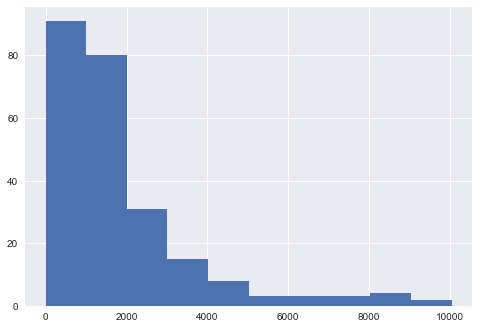

In [60]:
grouped_subway_data = subway_df.groupby(['UNIT'])
#print grouped_subway_data.groups
#print grouped_subway_data.mean()['ENTRIESn_hourly']
plt.hist(grouped_subway_data.mean()['ENTRIESn_hourly'])

In [61]:
grouped_subway_data = subway_df.groupby(['day_week'])
grouped_subway_data.mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


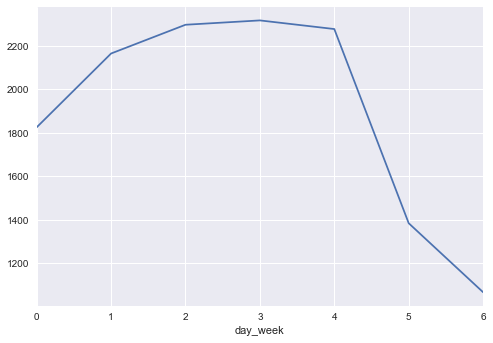

In [62]:
ridership_by_day = grouped_subway_data.mean()['ENTRIESn_hourly']
ridership_by_day.plot()

## Calculating Hourly Entries and Exits

In [63]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [64]:
# Standardize each group

def standardize(xs):
    return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby('even')
print grouped_data.groups, '\n'
print grouped_data['value'], '\n'
print grouped_data['value'].groups, '\n'

print grouped_data['value'].apply(standardize), '\n'# standardises the data in each group
print example_df['value'], '\n'
(example_df['value']-example_df['value'].mean())/example_df['value'].std()

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')} 


{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')} 

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64 

a    1
b    3
c    2
d    4
e    1
f    6
g    4
Name: value, dtype: int64 



a   -1.095445
b    0.000000
c   -0.547723
d    0.547723
e   -1.095445
f    1.643168
g    0.547723
Name: value, dtype: float64

In [65]:
# Find second largest value in each group

def second_largest(xs):
    sorted_xs = xs.sort(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby('even')
print grouped_data['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [66]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [67]:
def diff(cummulative_values):
    return cummulative_values.diff()

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    return entries_and_exits.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(diff)

ridership_by_station = ridership_df.groupby('UNIT')
print ridership_by_station.groups
print ridership_by_station[['ENTRIESn', 'EXITSn']].apply(diff)

get_hourly_entries_and_exits(ridership_df)

{'R051': Int64Index([0, 2, 4, 6, 8], dtype='int64'), 'R079': Int64Index([1, 3, 5, 7], dtype='int64')}
   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


## Combining Pandas DataFrames

In [68]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})
subway_df

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135


In [69]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})
weather_df

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
5,05-03-11,0,0,40.691320,-73.867135,30.14,0,54.0,3.5
6,05-04-11,0,0,40.689945,-73.872564,29.98,0,57.2,15.0
7,05-04-11,0,0,40.691320,-73.867135,29.98,0,57.2,15.0
8,05-05-11,0,0,40.689945,-73.872564,30.01,0,48.9,15.0
9,05-05-11,0,0,40.691320,-73.867135,30.01,0,48.9,15.0


In [70]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'], how='inner')

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [71]:
# if the dates in the two DataFrames had different keys (e.g. 'DATEn' in the first and just 'date' in the second),
# we could set left_on and right_on instead of just on,
# subway_df.merge(weather_df,
#                 left_on=['DATEn', 'hour', 'latitude', 'longitude'],
#                 right_on=['date', 'hour', 'latitude', 'longitude'], how='inner')

## Plotting for DataFrames

In [72]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [73]:
# groupby() without as_index

first_even = example_df.groupby('even').first()
first_even
#print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame

,above_three,value
even,,
False,False,1
True,False,2


In [74]:
# groupby() with as_index=False

first_even = example_df.groupby('even', as_index=False).first()
first_even

,even,above_three,value
0,False,False,1
1,True,False,2


In [75]:
first_even['even'] # Now 'even' is still a column in the DataFrame

0    False
1     True
Name: even, dtype: bool

In [76]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [77]:
from sets import Set

average_hourly_entries = subway_df.groupby(['UNIT', 'rain']).mean()['ENTRIESn_hourly']
average_hourly_entries

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


UNIT  rain
R003  0        223.767442
      1        220.666667
R004  0        542.029197
      1        598.552632
R005  0        538.797101
      1        602.970588
R006  0        627.094203
      1        657.357143
R007  0        378.269231
      1        394.750000
R008  0        404.847328
      1        432.026316
R009  0        334.458647
      1        329.404762
R011  0       7007.654930
      1       8581.071429
R012  0       8327.923611
      1       9977.166667
R013  0       2484.736111
      1       2989.761905
R016  0        747.535211
      1        964.571429
R017  0       3974.604167
      1       5033.761905
R018  0       7815.811189
      1       7783.523810
R019  0       3265.861111
      1       3273.833333
R020  0       6013.041667
      1       7681.833333
                 ...     
R356  0       1155.485075
      1       1183.619048
R358  0        310.759398
      1        316.882353
R370  0        552.681481
      1        616.512195
R371  0        758.684211
 

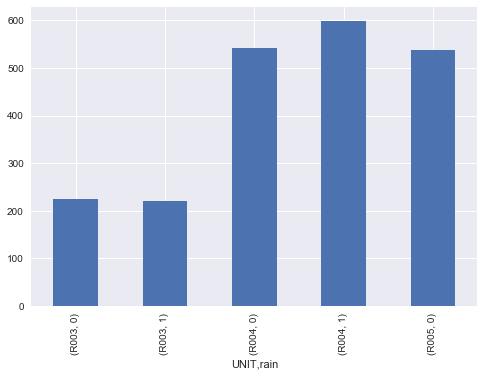

In [78]:
average_hourly_entries.head().plot(kind='bar')

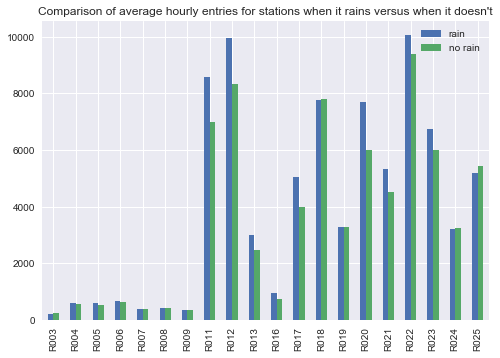

In [79]:
index_names, columns_names = zip(*average_hourly_entries.index.values)
index_names_set = Set([])
for name in index_names:
    index_names_set.add(name)
index_names_list = list(index_names_set)
index_names_list.sort()
# average_hourly_entries
# index_names_list
# average_hourly_entries.index.values
# average_hourly_entries.loc[('R003', 0)]
number_of_rows = 20
new_data = []
row_counter = 0
for name in index_names_list:
    row_counter += 1
    new_data.append([average_hourly_entries.loc[(name, 1)], average_hourly_entries.loc[(name, 0)]])
    if row_counter==number_of_rows:
        break
new_df = pd.DataFrame(
    data = new_data,
    index = index_names_list[0:number_of_rows],
    columns = ['rain', 'no rain']
)
# new_df
new_df.plot(kind='bar', title="Comparison of average hourly entries for stations when it rains versus when it doesn't")

In [80]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()

In [81]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

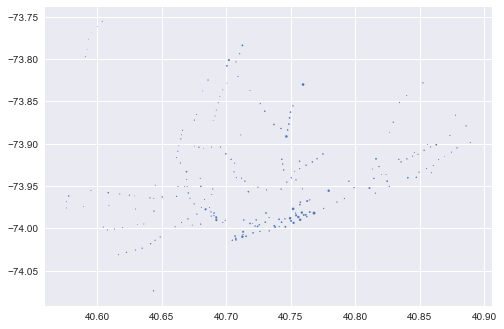

In [82]:
scaled_entries = data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_entries)

## 3D Data

In [83]:
a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])
a

array([[['A1a', 'A1b', 'A1c'],
        ['A2a', 'A2b', 'A2c']],

       [['B1a', 'B1b', 'B1c'],
        ['B2a', 'B2b', 'B2c']]], dtype='|S3')

In [84]:
# Pandas has a 3D data structure called a Panel:
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel